In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
import os 
import cv2
warnings.filterwarnings(action='ignore')

In [2]:
os.getcwd()

'/home/elice/project-cyberdyne/ai/EDA'

In [3]:
%cd ../../../dataset/validation-labels-src

/home/elice/dataset/validation-labels-src


In [4]:
ls -al

total 68
drwx------ 17 elice elice 4096 Jun  9 08:04 ./
drwxrwxr-x  6 elice elice 4096 Jun  9 08:25 ../
drwx------ 13 elice elice 4096 Jun  1  2021 가구류/
drwx------ 10 elice elice 4096 Jun  1  2021 고철류/
drwx------ 10 elice elice 4096 Jun  1  2021 나무/
drwx------ 12 elice elice 4096 Jun  1  2021 도기류/
drwx------  9 elice elice 4096 Jun  1  2021 비닐/
drwx------  6 elice elice 4096 Jun  1  2021 스티로폼/
drwx------ 10 elice elice 4096 Jun  1  2021 유리병/
drwx------ 10 elice elice 4096 Jun  1  2021 의류/
drwx------  5 elice elice 4096 Jun  1  2021 자전거/
drwx------ 29 elice elice 4096 Jun  1  2021 전자제품/
drwx------ 11 elice elice 4096 Jun  1  2021 종이류/
drwx------  8 elice elice 4096 Jun  1  2021 캔류/
drwx------  5 elice elice 4096 Jun  1  2021 페트병/
drwx------  8 elice elice 4096 Jun  1  2021 플라스틱류/
drwx------  8 elice elice 4096 Jun  1  2021 형광등/


In [19]:
category=dict()
category_1=dict()
category_2=[]
train_category=[]
for dirpath, dirnames,filenames in os.walk(os.curdir):

    for filename in filenames :
        print(os.path.join(dirpath,filename))
        #print(dirpath.split('/'))
        cate=dirpath.split('/')
        category[cate[1]]=category.get(cate[1],0)+1
        category_2.append(cate[1])
        train_category.append(os.path.join(dirpath,filename))

./의류/외투/18_X002_C331_1202/18_X002_C331_1202_4.Json
./의류/외투/18_X002_C331_1202/18_X002_C331_1202_2.Json
./의류/외투/18_X002_C331_1202/18_X002_C331_1202_3.Json
./의류/외투/18_X002_C331_1202/18_X002_C331_1202_0.Json
./의류/외투/18_X002_C331_1202/18_X002_C331_1202_1.Json
./의류/외투/18_X321_C900_1209/18_X321_C900_1209_0.Json
./의류/외투/18_X321_C900_1209/18_X321_C900_1209_4.Json
./의류/외투/18_X321_C900_1209/18_X321_C900_1209_1.Json
./의류/외투/18_X321_C900_1209/18_X321_C900_1209_3.Json
./의류/외투/18_X321_C900_1209/18_X321_C900_1209_2.Json
./의류/외투/18_X060_C193_1124/18_X060_C193_1124_2.Json
./의류/외투/18_X060_C193_1124/18_X060_C193_1124_0.Json
./의류/외투/18_X060_C193_1124/18_X060_C193_1124_1.Json
./의류/외투/18_X060_C193_1124/18_X060_C193_1124_3.Json
./의류/외투/18_X060_C193_1124/18_X060_C193_1124_4.Json
./의류/외투/18_X002_C188_1123/18_X002_C188_1123_0.Json
./의류/외투/18_X002_C188_1123/18_X002_C188_1123_2.Json
./의류/외투/18_X002_C188_1123/18_X002_C188_1123_4.Json
./의류/외투/18_X002_C188_1123/18_X002_C188_1123_3.Json
./의류/외투/18_X002_C188_1123/18_X0

./캔류/음료수캔/22_X149_C999_0320/22_X149_C999_0320_3.Json
./캔류/음료수캔/22_X149_C999_0320/22_X149_C999_0320_4.Json
./캔류/음료수캔/22_X149_C999_0320/22_X149_C999_0320_1.Json
./캔류/음료수캔/22_X149_C999_0320/22_X149_C999_0320_2.Json
./캔류/음료수캔/22_X149_C999_0320/22_X149_C999_0320_0.Json
./캔류/음료수캔/22_X016_C014_1030/22_X016_C014_1030_0.Json
./캔류/음료수캔/22_X016_C014_1030/22_X016_C014_1030_3.Json
./캔류/음료수캔/22_X016_C014_1030/22_X016_C014_1030_1.Json
./캔류/음료수캔/22_X016_C014_1030/22_X016_C014_1030_4.Json
./캔류/음료수캔/22_X016_C014_1030/22_X016_C014_1030_2.Json
./캔류/음료수캔/22_X046_C053_1105/22_X046_C053_1105_1.Json
./캔류/음료수캔/22_X046_C053_1105/22_X046_C053_1105_4.Json
./캔류/음료수캔/22_X046_C053_1105/22_X046_C053_1105_3.Json
./캔류/음료수캔/22_X046_C053_1105/22_X046_C053_1105_2.Json
./캔류/음료수캔/22_X046_C053_1105/22_X046_C053_1105_0.Json
./캔류/음료수캔/22_X594_C818_0416/22_X594_C818_0416_1.Json
./캔류/음료수캔/22_X594_C818_0416/22_X594_C818_0416_3.Json
./캔류/음료수캔/22_X594_C818_0416/22_X594_C818_0416_4.Json
./캔류/음료수캔/22_X594_C818_0416/22_X594_C818_0416_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
print(category)

{'의류': 5151, '자전거': 5054, '종이류': 5056, '캔류': 5020, '비닐': 5168, '도기류': 5065, '고철류': 5079, '스티로폼': 5047, '페트병': 5010, '전자제품': 5052, '형광등': 5040, '플라스틱류': 5040, '유리병': 5300, '가구류': 5110, '나무': 5185}


In [7]:
from operator import itemgetter

In [20]:
sorted_category=dict(sorted(category.items(),key=itemgetter(1)))
print(sorted_category)
print(len(sorted_category))

{'페트병': 5010, '캔류': 5020, '형광등': 5040, '플라스틱류': 5040, '스티로폼': 5047, '전자제품': 5052, '자전거': 5054, '종이류': 5056, '도기류': 5065, '고철류': 5079, '가구류': 5110, '의류': 5151, '비닐': 5168, '나무': 5185, '유리병': 5300}
15


In [22]:
#cate_=pd.DataFrame.from_dict(sorted_category, orient='index')
cate_2=pd.DataFrame (category_2, columns = ['category_name'])
train_category_2=pd.DataFrame (train_category, columns = ['file_path'])

print(cate_2)
print(train_category_2)

      category_name
0                의류
1                의류
2                의류
3                의류
4                의류
...             ...
76372            나무
76373            나무
76374            나무
76375            나무
76376            나무

[76377 rows x 1 columns]
                                               file_path
0      ./의류/외투/18_X002_C331_1202/18_X002_C331_1202_4....
1      ./의류/외투/18_X002_C331_1202/18_X002_C331_1202_2....
2      ./의류/외투/18_X002_C331_1202/18_X002_C331_1202_3....
3      ./의류/외투/18_X002_C331_1202/18_X002_C331_1202_0....
4      ./의류/외투/18_X002_C331_1202/18_X002_C331_1202_1....
...                                                  ...
76372  ./나무/도마/13_X002_C055_0201/13_X002_C055_0201_2....
76373  ./나무/도마/13_X002_C055_0201/13_X002_C055_0201_0....
76374  ./나무/도마/13_X002_C055_0201/13_X002_C055_0201_3....
76375  ./나무/도마/13_X002_C055_0201/13_X002_C055_0201_4....
76376  ./나무/도마/13_X002_C055_0201/13_X002_C055_0201_1....

[76377 rows x 1 columns]


<AxesSubplot:xlabel='category_name', ylabel='count'>

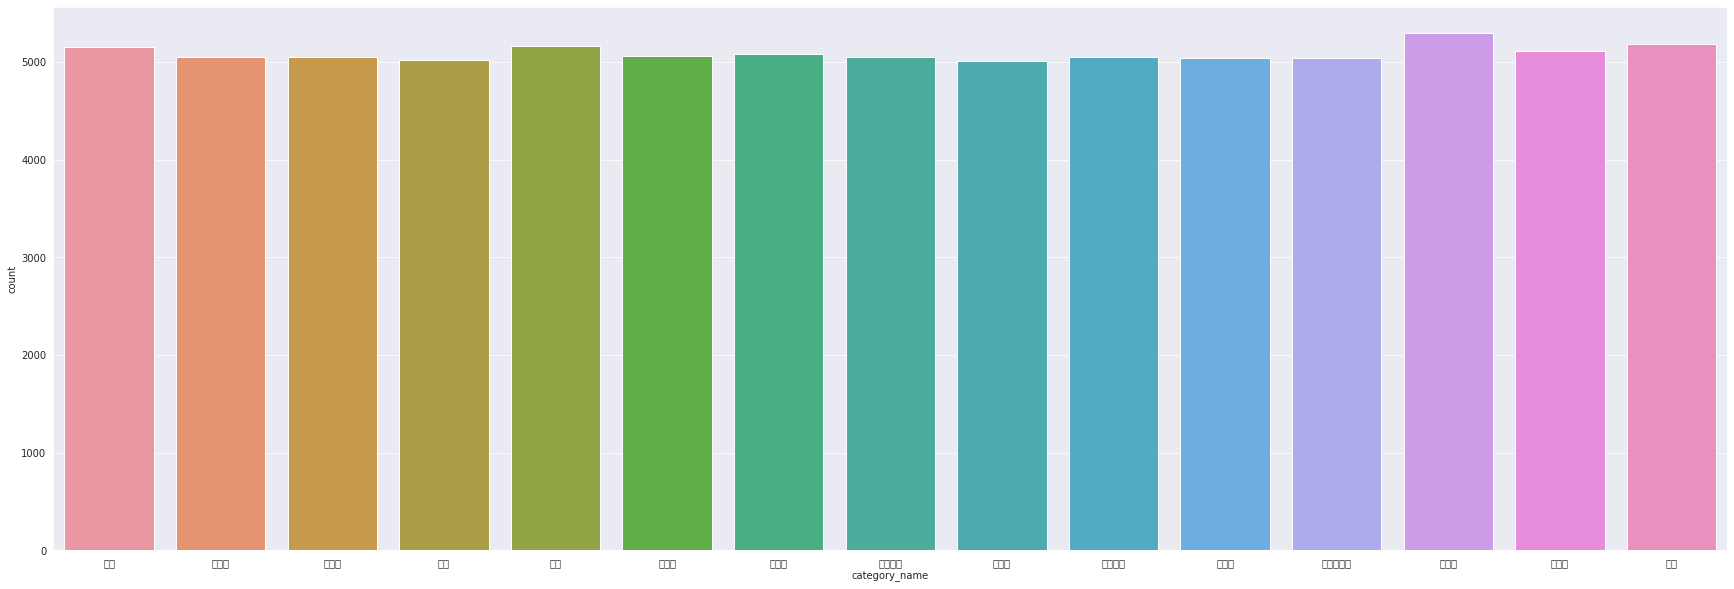

In [23]:
plt.figure(figsize=(30,10))
plt.rc('font',family='Malgun Gothic')
sns.set_style('darkgrid')
sns.countplot(cate_2['category_name'])

In [16]:
import cv2
from tqdm import tqdm
img_arrays=[]
for file in tqdm(train_category_2['file_path']):
    print(file)
#     img=cv2.imread(file)
#     #img = cv2.resize(img, (64, 64))
#     img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_arrays.append(np.array(img))
train_img=np.array(img_arrays)

 79%|██████████████████████████▏      | 60615/76377 [00:00<00:00, 299609.72it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|█████████████████████████████████| 76377/76377 [00:00<00:00, 247841.37it/s]

./가구류/의자/11_X056_C055_0120/11_X056_C055_0120_1.Json
./가구류/의자/11_X056_C055_0120/11_X056_C055_0120_3.Json
./가구류/의자/11_X056_C055_0120/11_X056_C055_0120_2.Json
./가구류/의자/11_X028_C501_0207/11_X028_C501_0207_0.Json
./가구류/의자/11_X028_C501_0207/11_X028_C501_0207_1.Json
./가구류/의자/11_X028_C501_0207/11_X028_C501_0207_4.Json
./가구류/의자/11_X028_C501_0207/11_X028_C501_0207_2.Json
./가구류/의자/11_X028_C501_0207/11_X028_C501_0207_3.Json
./가구류/의자/11_X047_C500_0312/11_X047_C500_0312_4.Json
./가구류/의자/11_X047_C500_0312/11_X047_C500_0312_1.Json
./가구류/의자/11_X047_C500_0312/11_X047_C500_0312_3.Json
./가구류/의자/11_X047_C500_0312/11_X047_C500_0312_0.Json
./가구류/의자/11_X047_C500_0312/11_X047_C500_0312_2.Json
./가구류/의자/11_X023_C509_0329/11_X023_C509_0329_0.Json
./가구류/의자/11_X023_C509_0329/11_X023_C509_0329_2.Json
./가구류/의자/11_X023_C509_0329/11_X023_C509_0329_4.Json
./가구류/의자/11_X023_C509_0329/11_X023_C509_0329_1.Json
./가구류/의자/11_X023_C509_0329/11_X023_C509_0329_3.Json
./가구류/의자/11_X148_C509_0414/11_X148_C509_0414_2.Json
./가구류/의자/11_